<a href="https://colab.research.google.com/github/ssv273/Neural_Univesity/blob/main/hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузите базу смс-сообщений, разделенных по категориям спам и не спам.

Создайте обучающую, проверочную выборки. Создайте и обучите модель, определяющую тип сообщения. Классифицируйте каждое сообщение. Чтобы было легче, каждое сообщение переделайте в последовательность токенов,и ограничьте или добейте нулями до определённой длины - 15.

Возьмите 10 случайных примеров из всей базы, сделайте предсказание нейронкой и выведите результат в читаемом виде:

“текст сообщения” - “категория сообщения, определенная нейронкой”.

Постройте диаграмму частотности распределения слов(plt.stem()) в нормальных сообщениях и сообщениях со спамом.

In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import json
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time
import seaborn as sns # Импортируем библиотеку seaborn
sns.set_style('darkgrid') # Устанавливаем стиль графиков

In [ ]:
df = pd.read_csv(open('/content/drive/MyDrive/psy.csv', errors = 'replace'))

In [ ]:
df.head(2)

,comment_id,author,date,content,class
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",True
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,True


In [ ]:
df = df[['content', 'class']]
df.head(2)

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",True
1,Hey guys check out my new channel and our firs...,True


In [ ]:
df.shape

(350, 2)

In [ ]:
df['class'].value_counts()

True     175
False    175
Name: class, dtype: int64

In [ ]:
nClasses = 2

In [ ]:
df.iloc[0]['content']

'Huh, anyway check out this you[tube] channel: kobyoshi02'

Получаем тексты и классы сообщений

In [ ]:
texts = df['content'].values #Извлекаем данные всех текстов из столбца text
classes = df['class'].astype('int8') #Извлекаем соответствующие им значения классов (лейблов) столбца text

In [ ]:
max_len = 0
for topic in texts:
  if len(topic) > max_len:
    max_len = len(topic)
max_len

1078

In [ ]:
maxWordsCount = 500 #Зададим максимальное количество слов/индексов, учитываемое при обучении текстов

In [ ]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(texts) #"Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
#Формируем матрицу индексов по принципу Bag of Words
xAll = tokenizer.texts_to_matrix(texts) #Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
print(xAll.shape)  #Посмотрим на форму текстов
print(xAll[0, :20])#И отдельно на фрагмент начала вектора

(350, 500)
[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print("Размер словаря", len(tokenizer.word_index.items()))

Размер словаря 1549


In [ ]:
y = classes

In [ ]:
y.shape

(350,)

## `Создайте обучающую, проверочную выборки`

In [ ]:
# разбиваем все данные на обучающую и тестовую выборки с помощью метода train_test_split из библиотеки sklearn
xTrain, xVal, yTrain, yVal = train_test_split(xAll, y, test_size=0.2, shuffle = True)
print(xTrain.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape) #и на форму соответсвующих им классов

(280, 500)
(280,)


Epoch 1/20
3/3 [==============================] - 1s 91ms/step - loss: 0.7042 - accuracy: 0.5036 - val_loss: 0.6845 - val_accuracy: 0.6571
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 0.6759 - accuracy: 0.6214 - val_loss: 0.6769 - val_accuracy: 0.6571
Epoch 3/20
3/3 [==============================] - 0s 14ms/step - loss: 0.6731 - accuracy: 0.5857 - val_loss: 0.6680 - val_accuracy: 0.7000
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 0.6611 - accuracy: 0.6500 - val_loss: 0.6570 - val_accuracy: 0.7714
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 0.6409 - accuracy: 0.7036 - val_loss: 0.6428 - val_accuracy: 0.7714
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6245 - accuracy: 0.7536 - val_loss: 0.6241 - val_accuracy: 0.7857
Epoch 7/20
3/3 [==============================] - 0s 14ms/step - loss: 0.6121 - accuracy: 0.7643 - val_loss: 0.5983 - val_accuracy: 0.8286
Epoch 8/20
3/3 [===========

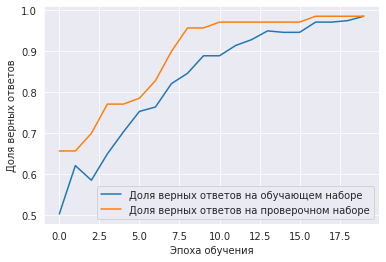

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(100, input_dim=maxWordsCount, activation="relu"))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Второй полносвязный слой
model01.add(Dense(100, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Третий полносвязный слой
model01.add(Dense(100, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Выходной полносвязный слой
model01.add(Dense(1, activation='sigmoid'))


model01.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=128,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model01.evaluate(xVal, yVal)

3/3 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9857


[0.08386864513158798, 0.9857142567634583]

## `каждое сообщение переделайте в последовательность токенов,и ограничьте или добейте нулями до определённой длины - 15.`

In [ ]:
# для Эмбэддинга представляем текст в виде последовательности индексов слов, каждый из которых затем преобразуем в многомерный вектор
sequences = tokenizer.texts_to_sequences(texts) #разбиваем текст на последовательность индексов
xTrainE, xValE, yTrainE, yValE = train_test_split(np.array(sequences, dtype=object), y, test_size=0.2)#сформируем новую форму выборки
print(xTrainE.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape)  #и на форму соответствующих им классов

(280,)
(280,)


In [ ]:
maxlen = 15

xTrainE = pad_sequences(xTrainE, maxlen=maxlen)
xValE = pad_sequences(xValE, maxlen=maxlen)

In [ ]:
xTrainE.shape

(280, 15)

Epoch 1/100
6/6 [==============================] - 1s 41ms/step - loss: 0.8726 - accuracy: 0.5214 - val_loss: 0.6895 - val_accuracy: 0.6286
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5110 - accuracy: 0.7357 - val_loss: 0.6839 - val_accuracy: 0.6429
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3674 - accuracy: 0.8250 - val_loss: 0.6804 - val_accuracy: 0.7143
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.2658 - accuracy: 0.9179 - val_loss: 0.6782 - val_accuracy: 0.7714
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1925 - accuracy: 0.9357 - val_loss: 0.6746 - val_accuracy: 0.7571
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1530 - accuracy: 0.9750 - val_loss: 0.6711 - val_accuracy: 0.7286
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1051 - accuracy: 0.9821 - val_loss: 0.6685 - val_accuracy: 0.7429
Epoch 8/100
6/6 [========

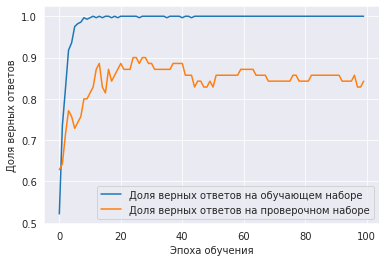

In [ ]:
#Создаём полносвязную сеть
modelE = Sequential()
#Cлой представления всего словаря слов в векторном представлении
modelE.add(Embedding(maxWordsCount, 50, input_length=maxlen))
#Слой регуляризации Dropout
modelE.add(SpatialDropout1D(0.2))
#Cлой преобразования двумерных данных в одномерные
modelE.add(Flatten())
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Полносвязный слой
modelE.add(Dense(64, activation="relu"))
#Слой регуляризации Dropout
modelE.add(Dropout(0.2))
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Выходной полносвязный слой
modelE.add(Dense(1, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrainE, 
                    yTrainE, 
                    epochs=100,
                    batch_size=50,
                    validation_data=(xValE, yValE))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## `Возьмите 10 случайных примеров из всей базы, сделайте предсказание нейронкой и выведите результат в читаемом виде:

“текст сообщения” - “категория сообщения, определенная нейронкой”.`

In [ ]:
for i in range(10):
  index = np.random.randint(0, df.shape[0])
  pred = model01.predict(tokenizer.texts_to_matrix([df.loc[i]['content']]))
  threshold = 0.5
  print(f"Message text: '{df.loc[i]['content']}'")
  print(f"Message label: {df.loc[i]['class'].astype('int8')}")
  print(f"Model predict label: {1 if pred >= threshold else 0}\n\n")

Message text: 'Huh, anyway check out this you[tube] channel: kobyoshi02'
Message label: 1
Model predict label: 1


Message text: 'Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!'
Message label: 1
Model predict label: 1


Message text: 'just for test I have to say murdev.com'
Message label: 1
Model predict label: 1


Message text: 'me shaking my sexy ass on my channel enjoy ^_^ ﻿'
Message label: 1
Model predict label: 1


Message text: 'watch?v=vtaRGgvGtWQ   Check this out .﻿'
Message label: 1
Model predict label: 0


Message text: 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com'
Message label: 1
Model predict label: 1


Message text: 'Subscribe to my channel ﻿'
Message label: 1
Model predict label: 1


Message text: 'i turned it on mute as soon is i came on i just wanted to check the  views...﻿'
Message label: 0
Model predict label: 

## `Постройте диаграмму частотности распределения слов(plt.stem()) в нормальных сообщениях и сообщениях со спамом.`

In [ ]:
# найдем все слова в сообщениях со спамом и без
df['class'] = df['class'].astype('int8')
spam_content = df[df['class'] == 1]['content'].values
no_spam_content = df[df['class'] == 0]['content'].values

In [ ]:
# передадим их в токенайзер для подсчета
tokenizer_spam = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer_spam.fit_on_texts(spam_content) 
tokenizer_no_spam = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer_no_spam.fit_on_texts(no_spam_content) 

In [ ]:
# объявим пустые словари для сообщений в категориях спам и не спам 
spam_words = {}
no_spam_words = {}
for word in list(tokenizer.word_index.keys())[1:]:  #Пробегаем по каждому слову из всех, находящихся в сообщениях (по глобальному токенайзеру)
  if word in tokenizer_spam.word_index.keys():      # если слово присутствует в сообщениях категории 'спам'
    # записываем это слово в словарь и присваиваем ему значение, сколько раз оно встречалось в сообщениях категории спам
    spam_words[word] = json.loads(tokenizer_spam.get_config()['word_counts'])[word] 
  else:
    # если такое слово не встречалось в этой категории, то количество вхождений, соответственно, проставляем ноль
    spam_words[word] = 0
# то же самое делаем для слов из категории 'не спам'
  if word in tokenizer_no_spam.word_index.keys():
    no_spam_words[word] = json.loads(tokenizer_no_spam.get_config()['word_counts'])[word]
  else:
    no_spam_words[word] = 0

In [ ]:
# чтобы не отрисовывать все слова, возьмем только те, которые встречаются более 10 раз
spam_words_short = dict((k, v) for k, v in spam_words.items() if v >= 10)
no_spam_words_short = dict((k, v) for k, v in no_spam_words.items() if v >= 10)

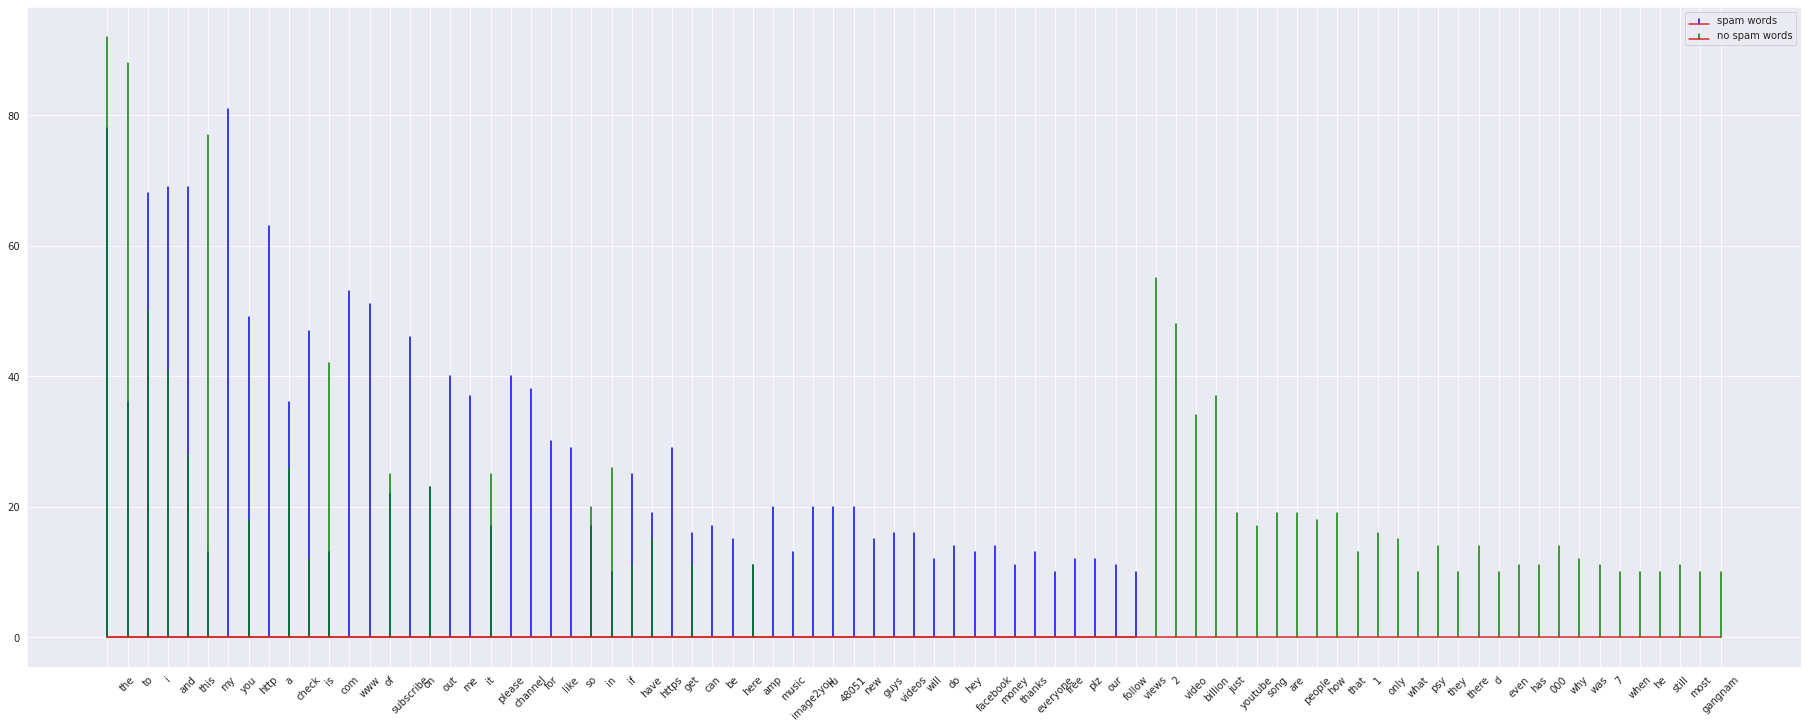

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10), constrained_layout=True)
plt.stem(spam_words_short.keys(), spam_words_short.values(), 'b', label='spam words', markerfmt='none')
plt.stem(no_spam_words_short.keys(), no_spam_words_short.values(), 'g', label='no spam words', markerfmt='none')
plt.setp( ax.get_xticklabels(), rotation=45 )
plt.legend()
